In [1]:
import os
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.io import imshow, imread
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout,BatchNormalization
from keras.optimizers import RMSprop,Adam
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


In [2]:
train=pd.read_csv('D:\MNIST DIGIT RECOGNITION\mnist-in-csv (1)\mnist_train.csv')
test=pd.read_csv('D:\MNIST DIGIT RECOGNITION\mnist-in-csv (1)\mnist_test.csv')

In [3]:
print('The Train  dataset has {} rows and {} columns'.format(train.shape[0],train.shape[1]))
print('The Test  dataset has {} rows and {} columns'.format(test.shape[0],test.shape[1]))

The Train  dataset has 60000 rows and 785 columns
The Test  dataset has 10000 rows and 785 columns


In [4]:
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


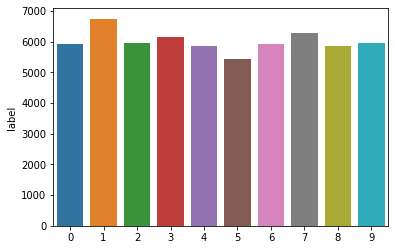

In [7]:
a=train.label.value_counts()
sns.barplot(a.index, a)

In [8]:
X_train=train.drop('label', axis=1)
Y_train=train['label']

In [9]:
X_train=X_train/255
X_train=X_train.values.reshape(-1,28,28,1)

In [10]:
X_train=X_train.astype('float')

In [11]:
Y_train=to_categorical(Y_train)

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X_train, Y_train, test_size=0.2, random_state=100)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

x_train is the training data set.
y_train is the set of labels to all the data in x_train.

x_test is the test data set.
y_test is the set of labels to all the data in x_test.

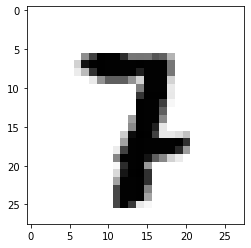

In [13]:
plt.imshow(x_train[62][:,:,0], cmap=plt.cm.binary)

In [14]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [15]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization(momentum=.15))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization(momentum=0.15))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization(momentum=.15))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [16]:
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(10, activation = "softmax"))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)       

In [18]:
#plot_model(model, to_file='model.png')
#SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [19]:
optimizer=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)

In [20]:
model.compile(optimizer=optimizer,loss=['categorical_crossentropy'],metrics=['accuracy'])

In [21]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [22]:
earlystop = EarlyStopping(patience=10)

In [23]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [24]:
callbacks = [learning_rate_reduction, earlystop]

In [25]:
epochs=30
batch_size=64

In [26]:
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=callbacks)

Epoch 1/30
 - 429s - loss: 0.3397 - accuracy: 0.8923 - val_loss: 0.0451 - val_accuracy: 0.9868
Epoch 2/30
 - 425s - loss: 0.0987 - accuracy: 0.9709 - val_loss: 0.0506 - val_accuracy: 0.9841
Epoch 3/30
 - 421s - loss: 0.0733 - accuracy: 0.9786 - val_loss: 0.0438 - val_accuracy: 0.9865
Epoch 4/30
 - 427s - loss: 0.0642 - accuracy: 0.9817 - val_loss: 0.0352 - val_accuracy: 0.9901
Epoch 5/30
 - 423s - loss: 0.0569 - accuracy: 0.9831 - val_loss: 0.0279 - val_accuracy: 0.9920
Epoch 6/30
 - 366s - loss: 0.0522 - accuracy: 0.9849 - val_loss: 0.0316 - val_accuracy: 0.9908
Epoch 7/30
 - 330s - loss: 0.0478 - accuracy: 0.9860 - val_loss: 0.0196 - val_accuracy: 0.9942
Epoch 8/30
 - 338s - loss: 0.0451 - accuracy: 0.9872 - val_loss: 0.0238 - val_accuracy: 0.9926
Epoch 9/30
 - 331s - loss: 0.0395 - accuracy: 0.9881 - val_loss: 0.0273 - val_accuracy: 0.9927
Epoch 10/30
 - 324s - loss: 0.0372 - accuracy: 0.9891 - val_loss: 0.0199 - val_accuracy: 0.9943
Epoch 11/30
 - 335s - loss: 0.0385 - accuracy: 0.

In [27]:
history.history['loss']

[0.33966304994761753,
 0.09872687105566517,
 0.07329959699808518,
 0.0642262712857023,
 0.056860153727817844,
 0.05221384901838157,
 0.04779558829151158,
 0.04506341801218792,
 0.03948166428289987,
 0.037245959208869715,
 0.03851735318728634,
 0.035471514158975634,
 0.03544100148557599,
 0.030877640744910517,
 0.03202098712661856,
 0.027062208191509056,
 0.029056306377799587,
 0.02701682846828214,
 0.028788732543667574,
 0.025881231652890718,
 0.02659477869973949,
 0.023269239235633035,
 0.02282245800280386,
 0.02361061907880558,
 0.021720599139444956,
 0.022240315509822518,
 0.020634565718288343,
 0.02014767608305652,
 0.018424797386842086,
 0.019819078708962146]

In [28]:
history.history['accuracy']

[0.8923259,
 0.9709178,
 0.9785719,
 0.9816569,
 0.9830576,
 0.98490864,
 0.9860092,
 0.9872432,
 0.9880603,
 0.9890775,
 0.9884772,
 0.98967785,
 0.98964447,
 0.9911953,
 0.99081177,
 0.9923459,
 0.9915955,
 0.9924126,
 0.9917623,
 0.99239594,
 0.99211246,
 0.9930963,
 0.99321306,
 0.9931297,
 0.9939134,
 0.99327976,
 0.9938801,
 0.99378,
 0.99453044,
 0.9939634]

Text(0, 0.5, 'accuracy')

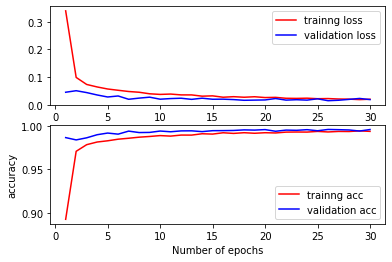

In [29]:
fig,ax=plt.subplots(2,1)
fig.set

x=range(1,1+epochs)

ax[0].plot(x,history.history['loss'],color='red')
ax[0].plot(x,history.history['val_loss'],color='blue')

ax[1].plot(x,history.history['accuracy'],color='red')
ax[1].plot(x,history.history['val_accuracy'],color='blue')

ax[0].legend(['trainng loss','validation loss'])
ax[1].legend(['trainng acc','validation acc'])

plt.xlabel('Number of epochs')
plt.ylabel('accuracy')


In [30]:
y_predict=model.predict(x_test)
y_predict=np.argmax(y_predict, axis=1) # argmax returns the indices of the maximum element of the array in a particular axis
y_test=np.argmax(y_test, axis=1)
y_test

array([6, 8, 0, ..., 8, 4, 8], dtype=int64)

In [31]:
conf=confusion_matrix(y_test, y_predict)
conf=pd.DataFrame(conf,index=range(0,10),columns=range(0,10))
conf

,0,1,2,3,4,5,6,7,8,9
0,1184,0,0,0,0,0,0,0,1,0
1,0,1360,0,1,0,0,0,4,0,0
2,0,1,1146,0,0,0,0,3,2,0
3,1,0,0,1244,0,1,0,1,0,0
4,0,1,0,0,1186,0,0,1,0,8
5,0,0,0,4,0,1082,0,0,3,0
6,3,1,0,0,0,2,1191,0,1,0
7,0,1,0,0,1,0,0,1227,0,1
8,0,1,1,1,0,0,0,0,1203,0
9,0,0,1,1,0,0,0,0,0,1130


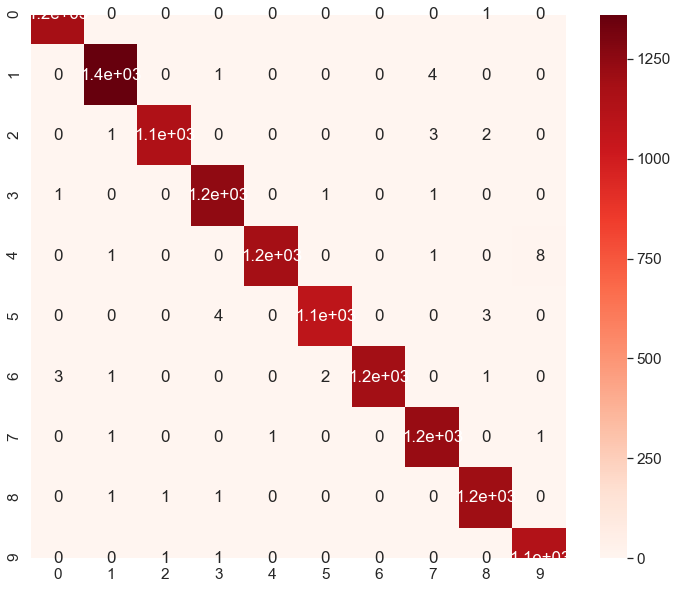

In [32]:
plt.figure(figsize=(12,10))
sns.set(font_scale=1.4) # for label size
sns.heatmap(conf, annot=True,cmap=plt.cm.Reds)

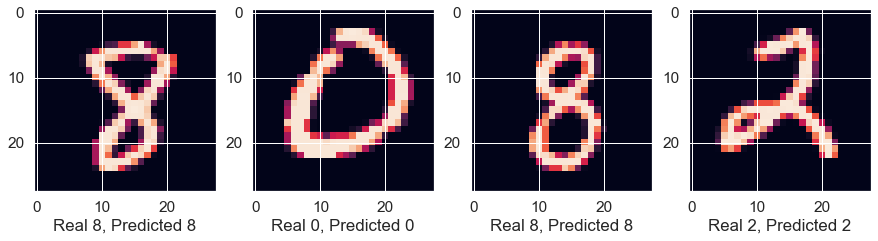

In [33]:
fig,ax=plt.subplots(1,4, sharey=False, figsize=(15,15))

for i in range(4):
    ax[i].imshow(x_test[x[i]][:,:,0]) 
    ax[i].set_xlabel('Real {}, Predicted {}'.format(y_test[x[i]],y_predict[x[i]]))

In [34]:
test=pd.read_csv('D:\MNIST DIGIT RECOGNITION\mnist-in-csv (1)\mnist_test.csv')
test.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
test.shape

(10000, 785)

In [36]:
test=test.drop('label', axis=1)
test.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


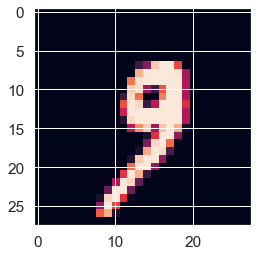

In [37]:
test=test/255
test=test.values.reshape(-1,28,28,1)
test=test.astype('float')
plt.imshow(test[1000][:,:,0])

In [38]:
y_pre=model.predict(test)
y_pre=np.argmax(y_pre, axis=1)
y_pre

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [39]:
test_pred = pd.DataFrame(model.predict(test, batch_size=200))
test_pred = pd.DataFrame(test_pred.idxmax(axis = 1))
test_pred.index.name = 'Image'
test_pred = test_pred.rename(columns = {0: 'Label'}).reset_index()
print(test_pred.head())
test_pred['Image'] = test_pred['Image'] + 1
test_pred.head()

   Image  Label
0      0      7
1      1      2
2      2      1
3      3      0
4      4      4


,Image,Label
0,1,7
1,2,2
2,3,1
3,4,0
4,5,4


In [40]:
test_pred.to_csv('mnist_submission.csv', index = False)